In [ ]:
amz_NDVI_reduced = reduce(amz_NDVI)
amz_SIF_reduced = reduce(amz_SIF)
nam_NDVI_reduced = reduce(amz_NDVI)
nam_SIF_reduced = reduce(amz_SIF)
pnw_NDVI_reduced = reduce(pnw_NDVI)
pnw_SIF_reduced = reduce(pnw_SIF)

np_amz_NDVI_reduced = np.asarray(amz_NDVI_reduced)
np_amz_SIF_reduced = np.asarray(amz_SIF_reduced)
np_nam_NDVI_reduced = np.asarray(nam_NDVI_reduced)
np_nam_SIF_reduced = np.asarray(nam_SIF_reduced)
np_pnw_NDVI_reduced = np.asarray(pnw_NDVI_reduced)
np_pnw_SIF_reduced = np.asarray(pnw_SIF_reduced)

In [256]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from sklearn import preprocessing as prep
from statistics import variance
from statistics import pvariance

In [36]:
amz = pd.read_csv('Remotesensing_table_Amazon.csv', header = None, delimiter=',')
nam = pd.read_csv('Remotesensing_table_NamCorn.csv', header = None, delimiter=',')
pnw = pd.read_csv('Remotesensing_table_PNW.csv', header = None, delimiter=',')

In [37]:
col_names =["Year", "Month", "SIF", "NDVI", "NSAT", "P", "CDC"]

In [38]:
amz.columns = col_names
nam.columns = col_names
pnw.columns = col_names

In [229]:
def split_by_year(arr):
    NDVI = [[] for i in range(0,int(len(arr["Year"])/12))]
    SIF = [[] for i in range(0,int(len(arr["Year"])/12))]
    P = [[] for i in range(0,int(len(arr["Year"])/12))]
    CO2 = [[] for i in range(0,int(len(arr["Year"])/12))]
    NSAT = [[] for i in range(0,int(len(arr["Year"])/12))]
    year = 0
    month = 0
    for i in range(0,len(arr["Year"])):
        if(month == 12):
            year = year + 1
            month = 0
        NDVI[year].append(arr["NDVI"][i])
        SIF[year].append(arr["SIF"][i])
        NSAT[year].append(arr["NSAT"][i])
        P[year].append(arr["P"][i])
        CO2[year].append(arr["CDC"][i])
        month = month + 1
        
    return NDVI, SIF, P, CO2, NSAT

def reduce(arr):
    a = []
    a.append(arr[1])
    a.append(arr[6*1])
    a.append(arr[6*2])
    a.append(arr[6*3])
    a.append(arr[6*4])
    a.append(arr[6*5])
    return a



In [347]:
years = [str(i) for i in range(1981,2017)]
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

amz_NDVI, amz_SIF, amz_P, amz_CO2, amz_NSAT = split_by_year(amz)
nam_NDVI, nam_SIF, nam_P, nam_CO2, nam_NSAT = split_by_year(nam)
pnw_NDVI, pnw_SIF, pnw_P, pnw_CO2, pnw_NSAT = split_by_year(pnw)

np_amz_NDVI = np.asarray(amz_NDVI)
np_amz_SIF = np.asarray(amz_SIF)
np_amz_P = np.asarray(amz_P)
np_amz_CO2 = np.asarray(amz_CO2)
np_amz_NSAT = np.asarray(amz_NSAT)

np_nam_NDVI = np.asarray(nam_NDVI)
np_nam_SIF = np.asarray(nam_SIF)
np_nam_P = np.asarray(nam_P)
np_nam_CO2 = np.asarray(nam_CO2)
np_nam_NSAT = np.asarray(nam_NSAT)

np_pnw_NDVI = np.asarray(pnw_NDVI)
np_pnw_SIF = np.asarray(pnw_SIF)
np_pnw_P = np.asarray(pnw_P)
np_pnw_CO2 = np.asarray(pnw_CO2)
np_pnw_NSAT = np.asarray(pnw_NSAT)

# Amazon

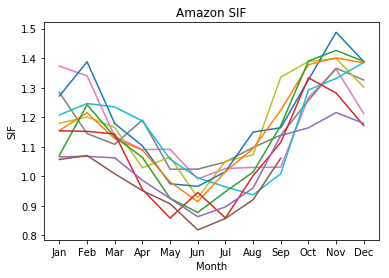

In [325]:
plt.title("Amazon SIF")
plt.xlabel("Month")
plt.ylabel("SIF")
plt.plot(months, np_amz_SIF.T)
plt.show()

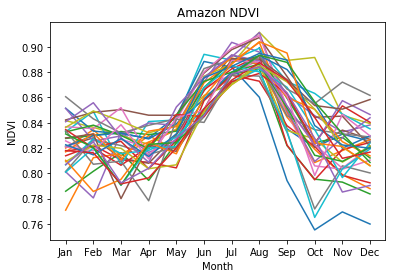

In [326]:
plt.title("Amazon NDVI")
plt.xlabel("Month")
plt.ylabel("NDVI")
plt.plot(months, np_amz_NDVI.T)
plt.show()

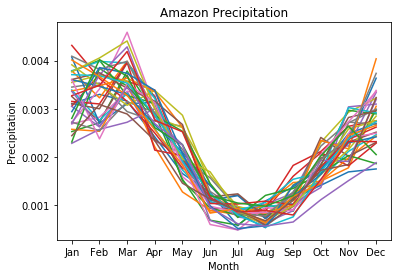

In [327]:
plt.title("Amazon Precipitation")
plt.xlabel("Month")
plt.ylabel("Precipitation")
plt.plot(months, np_amz_P.T)
plt.show()

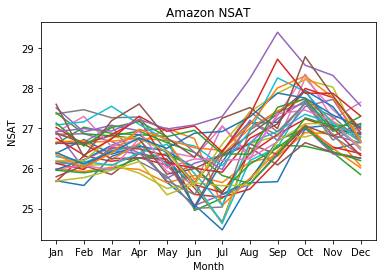

In [328]:
plt.title("Amazon NSAT")
plt.xlabel("Month")
plt.ylabel("NSAT")
plt.plot(months, np_amz_NSAT.T)
plt.show()

# Nam Corn

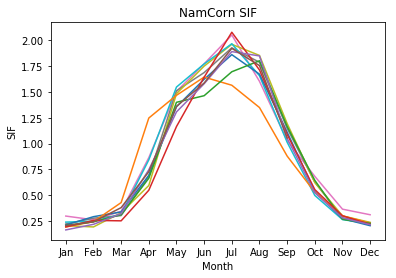

In [329]:
plt.title("NamCorn SIF")
plt.xlabel("Month")
plt.ylabel("SIF")
plt.plot(months, np_nam_SIF.T)
plt.show()

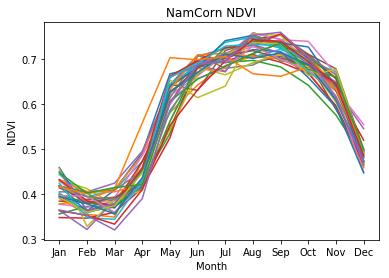

In [330]:
plt.title("NamCorn NDVI")
plt.xlabel("Month")
plt.ylabel("NDVI")
plt.plot(months, np_nam_NDVI.T)
plt.show()

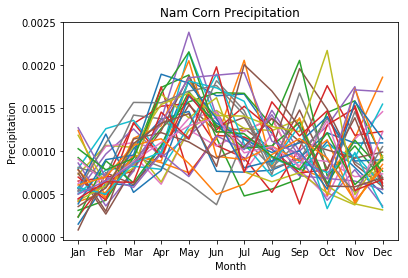

In [331]:
plt.title("Nam Corn Precipitation")
plt.xlabel("Month")
plt.ylabel("Precipitation")
plt.plot(months, np_nam_P.T)
plt.show()

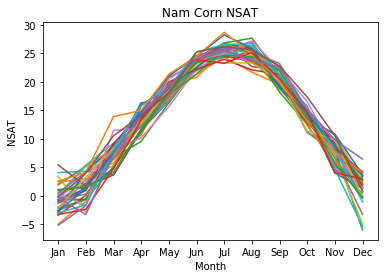

In [332]:
plt.title("Nam Corn NSAT")
plt.xlabel("Month")
plt.ylabel("NSAT")
plt.plot(months, np_nam_NSAT.T)
plt.show()

# PNW

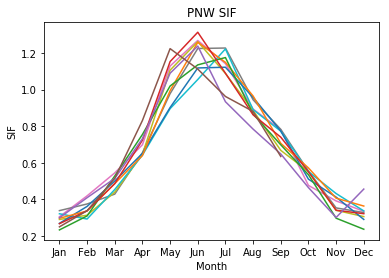

In [324]:
plt.title("PNW SIF")
plt.xlabel("Month")
plt.ylabel("SIF")
plt.plot(months ,np_pnw_SIF.T)
plt.show()

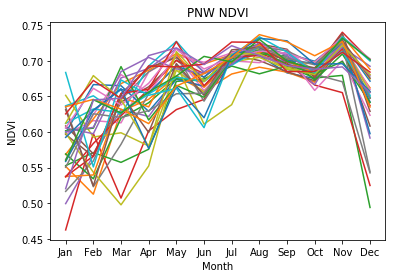

In [333]:
plt.title("PNW NDVI")
plt.xlabel("Month")
plt.ylabel("NDVI")
plt.plot(months, np_pnw_NDVI.T)
plt.show()

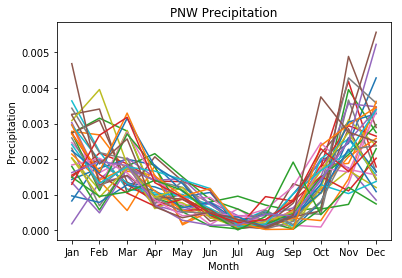

In [334]:
plt.title("PNW Precipitation")
plt.xlabel("Month")
plt.ylabel("Precipitation")
plt.plot(months, np_pnw_P.T)
plt.show()

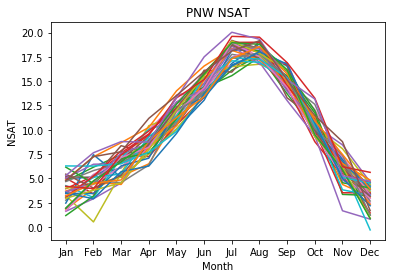

In [335]:
plt.title("PNW NSAT")
plt.xlabel("Month")
plt.ylabel("NSAT")
plt.plot(months, np_pnw_NSAT.T)
plt.show()

# Extra Stuff

In [227]:
norm_amz_P = [float(i)/max(list(amz["P"])) for i in list(amz["P"])]
norm_amz_C = [float(i)/max(list(amz["CDC"])) for i in list(amz["CDC"])]
norm_amz_SIF = [float(i)/np.nanmax(list(amz["SIF"])) for i in list(amz["SIF"])]

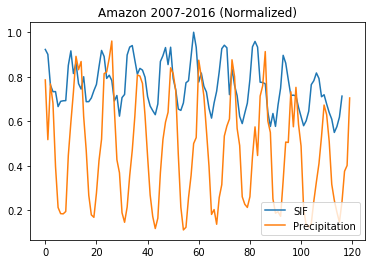

In [228]:
plt.title("Amazon 2007-2016 (Normalized)")
plt.plot(norm_amz_SIF[312:432], label="SIF")
plt.plot(norm_amz_P[312:432], label="Precipitation")
plt.legend(loc = 'lower right')
plt.show()

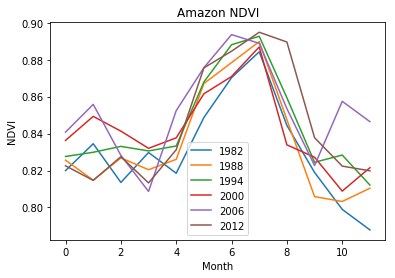

In [162]:
plt.title("Amazon NDVI")
plt.xlabel("Month")
plt.ylabel("NDVI")
plt.plot(amz_NDVI[1], label = years[0])
plt.plot(amz_NDVI[6], label = years[1])
plt.plot(amz_NDVI[12], label = years[2])
plt.plot(amz_NDVI[18], label = years[3])
plt.plot(amz_NDVI[24], label = years[4])
plt.plot(amz_NDVI[30], label = years[5])
plt.legend()
plt.show()

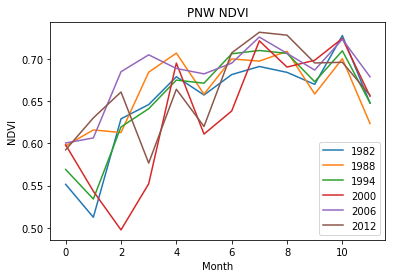

In [158]:
plt.title("PNW NDVI")
plt.xlabel("Month")
plt.ylabel("NDVI")
plt.plot(pnw_NDVI[1], label = years[0])
plt.plot(pnw_NDVI[6], label = years[1])
plt.plot(pnw_NDVI[12], label = years[2])
plt.plot(pnw_NDVI[18], label = years[3])
plt.plot(pnw_NDVI[24], label = years[4])
plt.plot(pnw_NDVI[30], label = years[5])
plt.legend()
plt.show()

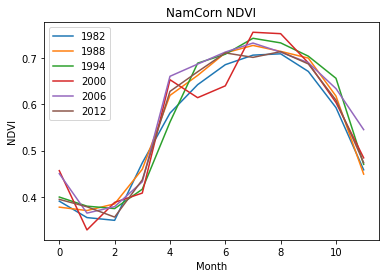

In [160]:
plt.title("NamCorn NDVI")
plt.xlabel("Month")
plt.ylabel("NDVI")
plt.plot(nam_NDVI[1], label = years[0])
plt.plot(nam_NDVI[6], label = years[1])
plt.plot(nam_NDVI[12], label = years[2])
plt.plot(nam_NDVI[18], label = years[3])
plt.plot(nam_NDVI[24], label = years[4])
plt.plot(nam_NDVI[30], label = years[5])
plt.legend()
plt.show()

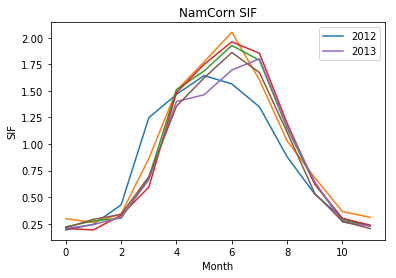

'2013'

In [369]:
plt.title("NamCorn SIF")
plt.xlabel("Month")
plt.ylabel("SIF")
plt.plot(np_nam_SIF[31].T, label = years[31])
plt.plot(np_nam_SIF[26].T)
plt.plot(np_nam_SIF[27].T)
plt.plot(np_nam_SIF[28].T)
plt.plot(np_nam_SIF[32].T, label = years[32])
plt.plot(np_nam_SIF[30].T)
plt.legend()
plt.show()
years[31]
years[32]

In [398]:
var_amz_SIF = [variance(i[26:35]) for i in np_amz_SIF.T]
var_nam_SIF = [variance(i[26:35]) for i in np_nam_SIF.T]
var_pnw_SIF = [variance(i[26:35]) for i in np_pnw_SIF.T]

var_nam_SIF_cut = [variance([*i[26:31],*i[33:35]]) for i in np_nam_SIF.T]

var_amz_NDVI = [variance(i[1:35]) for i in np_amz_NDVI.T]
var_nam_NDVI = [variance(i[1:35]) for i in np_nam_NDVI.T]
var_pnw_NDVI = [variance(i[1:35]) for i in np_pnw_NDVI.T]

var_nam_NDVI_cut = [variance([*i[1:31],*i[33:35]]) for i in np_nam_NDVI.T]

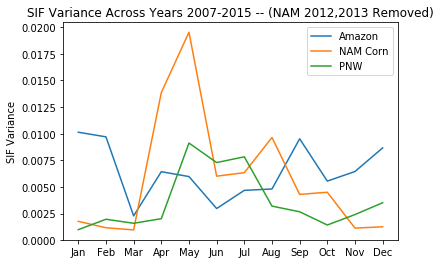

In [399]:
plt.title("SIF Variance Across Years 2007-2015 -- (NAM 2012,2013 Removed)")
plt.plot(months, var_amz_SIF, label = "Amazon")
plt.plot(months, var_nam_SIF_cut, label = "NAM Corn")
plt.plot(months,var_pnw_SIF, label = "PNW")
plt.ylabel("SIF Variance")
plt.legend()
plt.show()

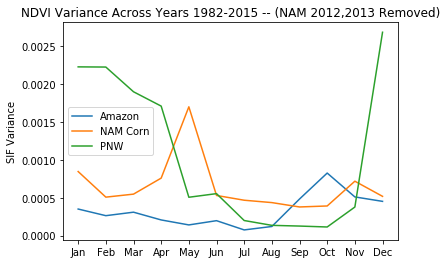

In [401]:
plt.title("NDVI Variance Across Years 1982-2015 -- (NAM 2012,2013 Removed)")
plt.plot(months, var_amz_NDVI, label = "Amazon")
plt.plot(months, var_nam_NDVI_cut, label = "NAM Corn")
plt.plot(months,var_pnw_NDVI, label = "PNW")
plt.ylabel("SIF Variance")
plt.legend()
plt.show()

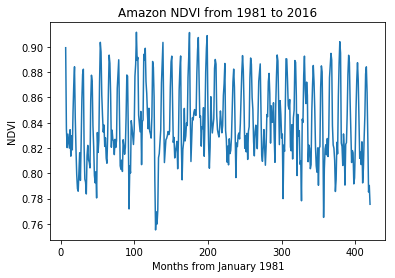

In [405]:
plt.plot(amz['NDVI'])
plt.title("Amazon NDVI from 1981 to 2016")
plt.xlabel("Months from January 1981")
plt.ylabel("NDVI")
plt.show()

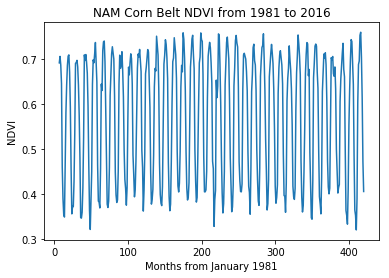

In [406]:
plt.plot(nam['NDVI'])
plt.title("NAM Corn Belt NDVI from 1981 to 2016")
plt.xlabel("Months from January 1981")
plt.ylabel("NDVI")
plt.show()

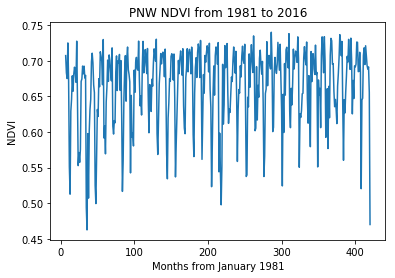

In [411]:
plt.plot(pnw['NDVI'])
plt.title("PNW NDVI from 1981 to 2016")
plt.xlabel("Months from January 1981")
plt.ylabel("NDVI")
plt.show()

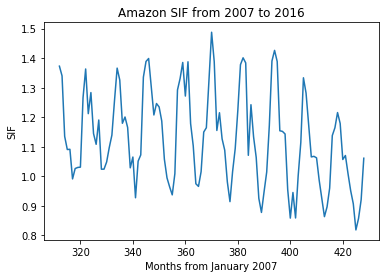

In [408]:
plt.plot(amz['SIF'])
plt.title("Amazon SIF from 2007 to 2016")
plt.xlabel("Months from January 2007")
plt.ylabel("SIF")
plt.show()

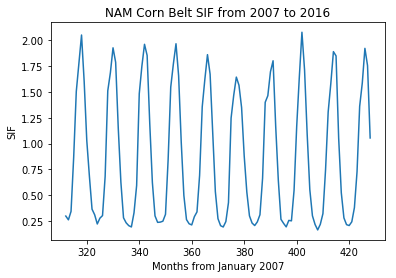

In [409]:
plt.plot(nam['SIF'])
plt.title("NAM Corn Belt SIF from 2007 to 2016")
plt.xlabel("Months from January 2007")
plt.ylabel("SIF")
plt.show()

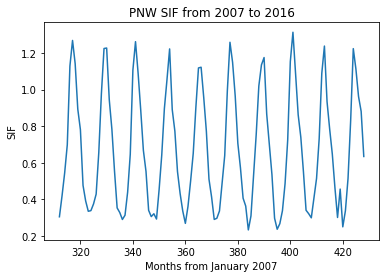

In [412]:
plt.plot(pnw['SIF'])
plt.title("PNW SIF from 2007 to 2016")
plt.xlabel("Months from January 2007")
plt.ylabel("SIF")
plt.show()